In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [16]:
zip_file_path = 'data.zip'
csv_file_inside_zip = 'data.csv'

In [17]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [18]:
warnings.filterwarnings("ignore")

In [19]:
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,42,1,1,0,0,1,6,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,1,0,0,0,0,0
4,2,1,42,1,1,0,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659704,3,0,49,1,1,0,0,12,4,0,...,0,1,0,0,0,0,0,0,0,0
659705,3,0,49,1,1,0,0,12,4,0,...,0,0,1,0,0,0,0,0,0,0
659706,3,0,49,1,1,0,0,12,4,0,...,0,0,0,1,0,0,0,0,0,0
659707,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
df.duplicated().sum()

0

In [129]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

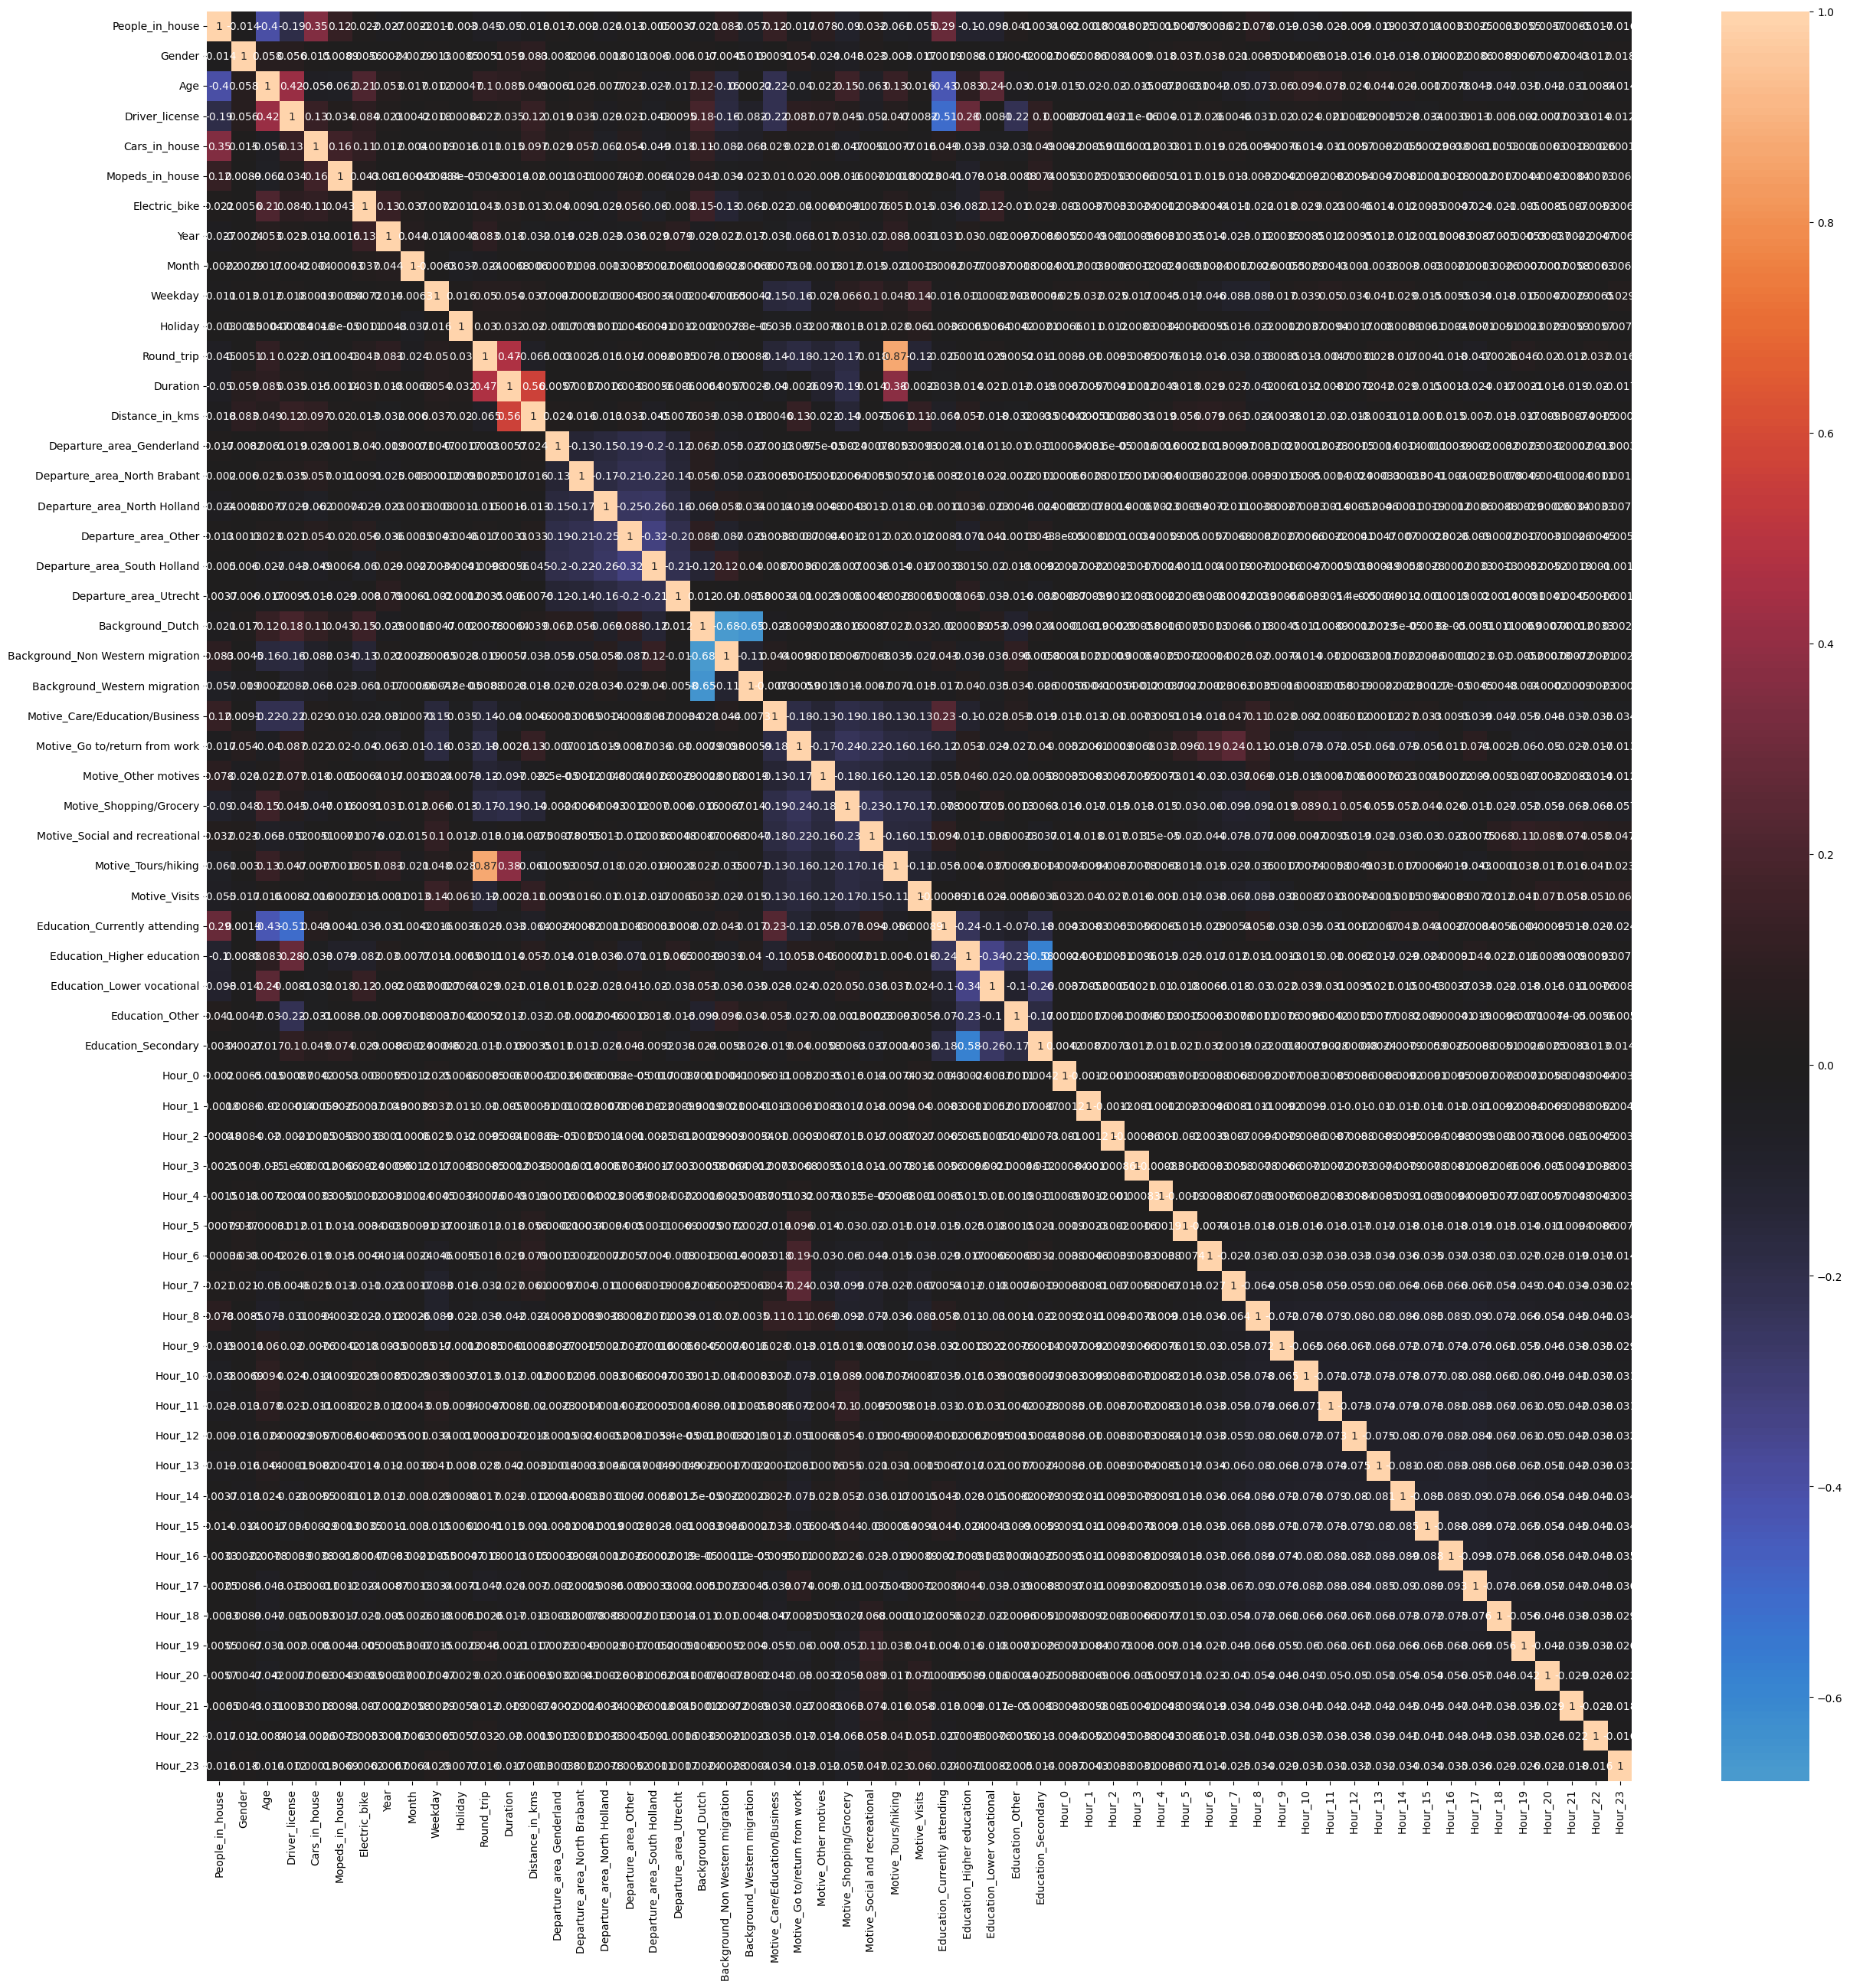

In [130]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [9]:
drops = ["Mode", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [10]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                            Variable       VIF
0                              const  0.000000
1                    People_in_house  1.440461
2                             Gender  1.026237
3                                Age  1.763200
4                     Driver_license  1.785534
5                      Cars_in_house  1.253080
6                    Mopeds_in_house  1.046971
7                      Electric_bike  1.100887
8                              Month  1.004602
9                            Weekday  1.103969
10                           Holiday  1.009483
11                        Round_trip  5.173351
12                          Duration  2.444409
13                   Distance_in_kms  1.963862
14         Departure_area_Genderland       inf
15      Departure_area_North Brabant       inf
16      Departure_area_North Holland       inf
17              Departure_area_Other       inf
18      Departure_area_South Holland       inf
19            Departure_area_Utrecht       inf
20           

In [9]:
drops = ["Mode", 'Motive_Tours/hiking', 'Background_Non Western migration', 'Education_Secondary',
        'Hour_17', 'Departure_area_Other']
X = df.drop(drops, axis=1)
y = df["Mode"]

In [10]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                          Variable         VIF
0                            const  104.168846
1                  People_in_house    1.316428
2                           Gender    1.030501
3                              Age    1.386475
4                   Driver_license    1.193193
5                    Cars_in_house    1.303516
6                  Mopeds_in_house    1.052203
7                    Electric_bike    1.109805
8                            Month    1.004660
9                          Weekday    1.100034
10                         Holiday    1.009169
11                      Round_trip    5.660094
12                        Duration    2.495367
13                 Distance_in_kms    2.006762
14       Departure_area_Genderland    1.293898
15    Departure_area_North Brabant    1.339977
16    Departure_area_North Holland    1.461340
17    Departure_area_South Holland    1.593419
18          Departure_area_Utrecht    1.334465
19                Background_Dutch    2.030384
20    Backgro

Those are the final features that we will use

In [21]:
drops = ['Motive_Tours/hiking', 'Background_Non Western migration', 'Education_Secondary',
        'Hour_17', 'Departure_area_Other']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Hour_13,Hour_14,Hour_15,Hour_16,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,42,1,1,0,0,1,6,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,1,0,0,0,0,0
4,2,1,42,1,1,0,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659704,3,0,49,1,1,0,0,12,4,0,...,0,0,1,0,0,0,0,0,0,0
659705,3,0,49,1,1,0,0,12,4,0,...,0,0,0,1,0,0,0,0,0,0
659706,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,0,0,0,0,0,0
659707,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
df.duplicated().sum()

0

In [23]:
df = df.drop_duplicates(subset=df.columns.difference(['Mode']))
df.shape

(659708, 53)

In [40]:
drops = ["Mode"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [41]:
X, y = shuffle(X, y, random_state=42)

In [42]:
df.shape

(659708, 53)

In [43]:
X.shape

(659708, 52)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =42, stratify=y)

In [45]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    276667
1    149180
2    145825
3     22065
Name: count, dtype: int64

Class counts in y_test:
Mode
0    30741
1    16576
2    16203
3     2451
Name: count, dtype: int64


In [46]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Care/Education/Business',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Visits', 'Education_Higher education',
       'Education_Lower vocational', 'Education_Other', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23'],
      dtype='obje

In [47]:
X_train

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Hour_13,Hour_14,Hour_15,Hour_16,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
172555,4,0,32,1,2,1,0,4,4,0,...,0,0,0,0,1,0,0,0,0,0
597247,2,0,68,0,1,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
468660,5,0,43,0,1,1,0,8,7,0,...,1,0,0,0,0,0,0,0,0,0
337626,4,1,82,0,2,0,1,9,4,0,...,0,0,0,0,0,0,0,0,0,0
266620,2,0,73,1,2,0,1,3,4,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208620,2,1,58,1,1,0,1,9,2,0,...,0,0,1,0,0,0,0,0,0,0
558900,1,0,73,1,1,0,0,8,6,0,...,0,0,0,0,0,0,0,0,0,0
287963,4,1,35,1,1,0,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
186632,3,1,57,1,1,1,0,7,6,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

In [49]:
pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler()),
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy="auto")),
    ('classifier', LogisticRegression(multi_class='ovr'))
])

In [50]:
param_grid = {'classifier__solver' : ['liblinear', 'lbfgs'],
              'classifier__C': [0.5, 0.6, 0.7, 0.8],
              'classifier__max_iter': [400]}
grid_search_log = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'classifier__C': 0.8, 'classifier__max_iter': 400, 'classifier__solver': 'liblinear'}


In [51]:
score = grid_search_log.best_score_
score

0.537635918399287

In [52]:
logreg_model = grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77     30741
           1       0.49      0.49      0.49     16576
           2       0.74      0.60      0.66     16203
           3       0.15      0.68      0.25      2451

    accuracy                           0.62     65971
   macro avg       0.56      0.62      0.54     65971
weighted avg       0.71      0.62      0.65     65971



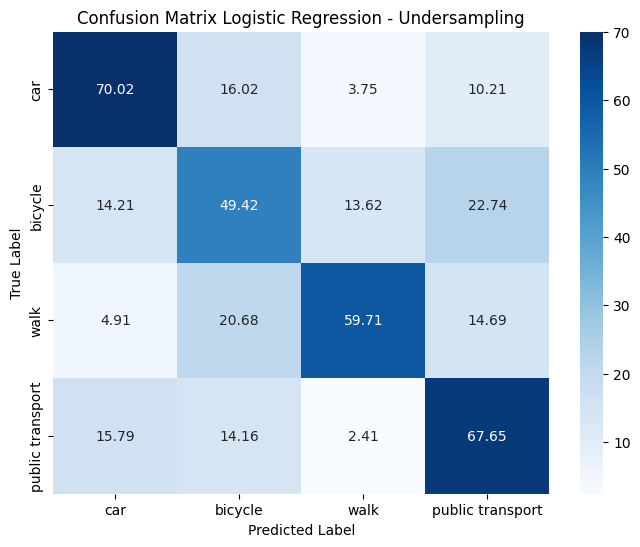

In [53]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

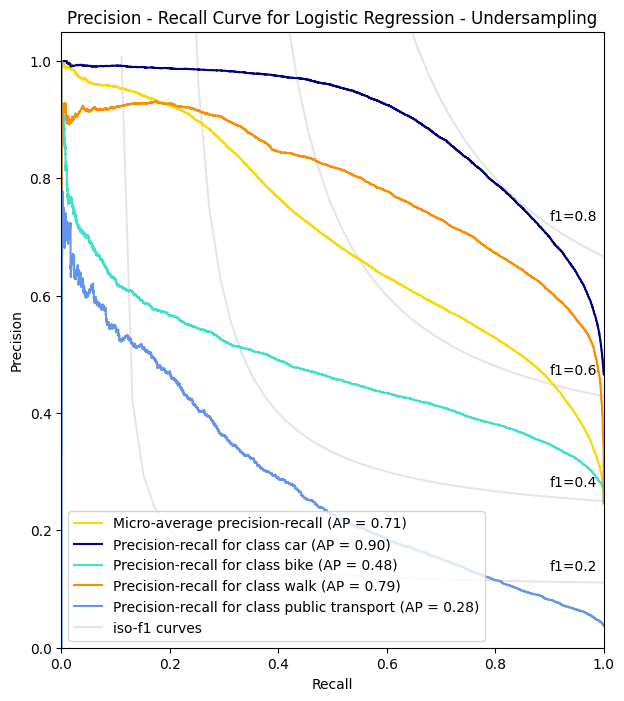

In [55]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Logistic Regression - Undersampling")

plt.show()

# Decision Tree

In [63]:
pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler()),
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy="auto")),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [64]:
param_grid = {
    'classifier__max_depth': list(range(2, 21)),
}

In [65]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")

In [66]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20]},
             scoring='f1_macro')

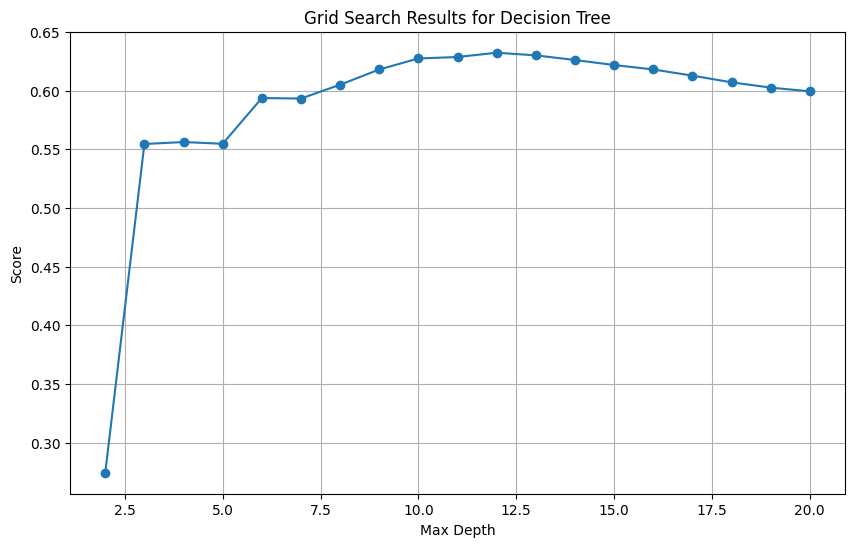

In [67]:
results = grid_search.cv_results_
max_depth_values = results['param_classifier__max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [68]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_f_score = grid_search.best_score_

In [69]:
best_params

{'classifier__max_depth': 12}

In [70]:
best_f_score

0.6323022480730772

In [71]:
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.92      0.68      0.79     30741
           1       0.55      0.65      0.60     16576
           2       0.82      0.83      0.82     16203
           3       0.21      0.66      0.32      2451

    accuracy                           0.71     65971
   macro avg       0.63      0.70      0.63     65971
weighted avg       0.78      0.71      0.73     65971



In [72]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Care/Education/Business',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Visits', 'Education_Higher education',
       'Education_Lower vocational', 'Education_Other', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23'],
      dtype='obje

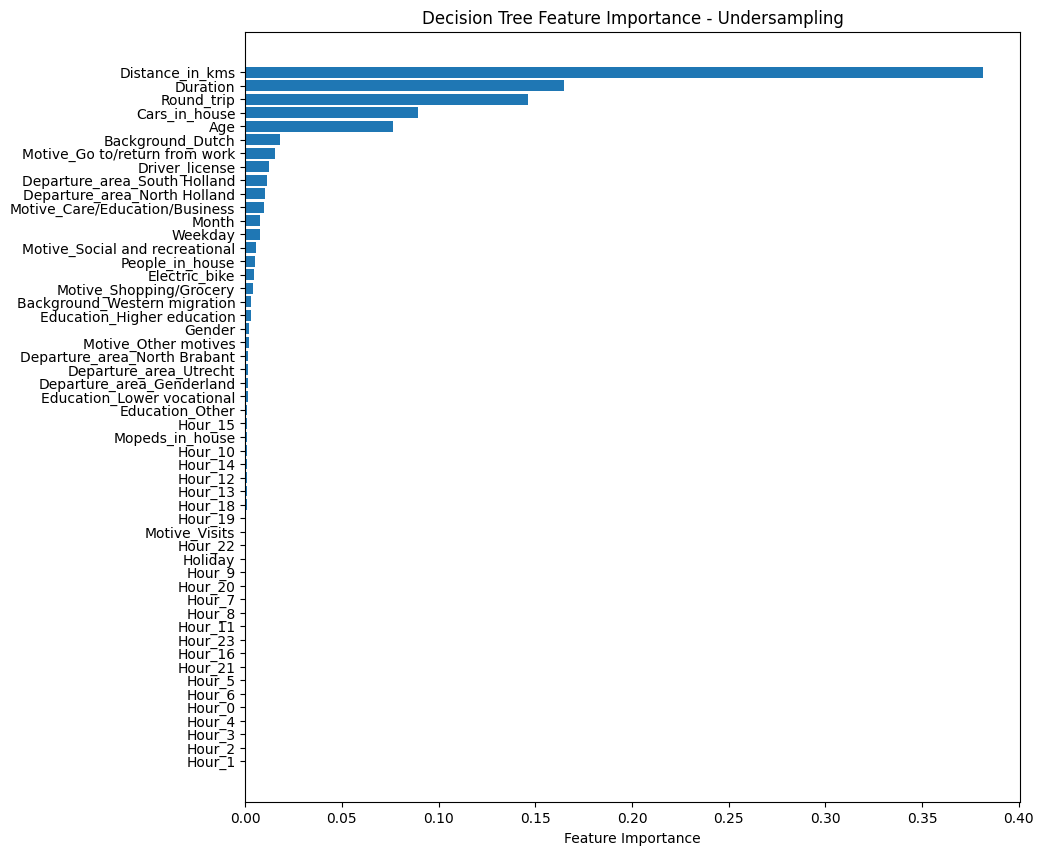

In [73]:
decision_tree_classifier = best_model.named_steps['classifier']

feature_importances = decision_tree_classifier.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Care/Education/Business',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Visits', 'Education_Higher education',
       'Education_Lower vocational', 'Education_Other', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance - Undersampling")
plt.show()

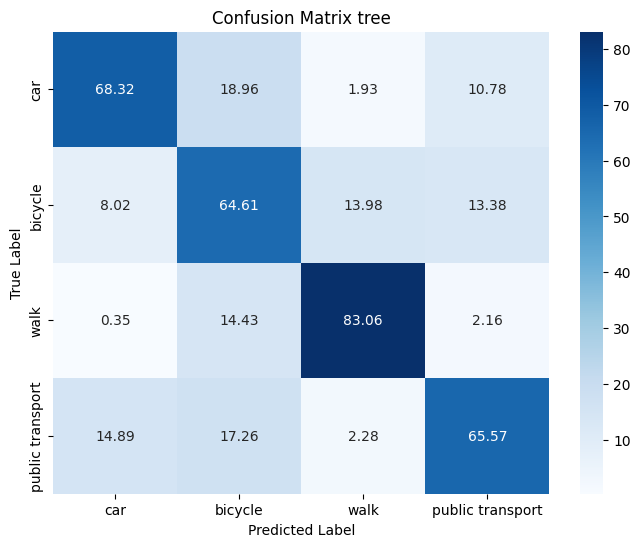

In [74]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [75]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

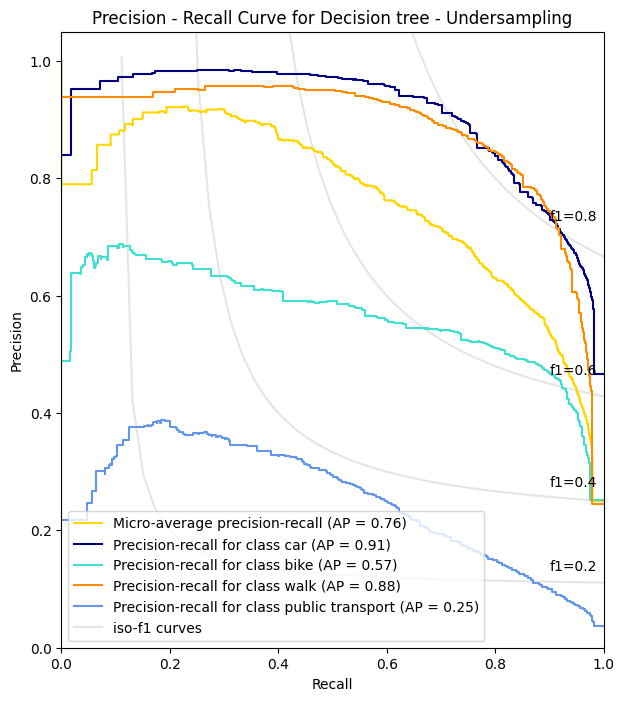

In [76]:
class_probabilities_tree = best_model.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree - Undersampling")

plt.show()

# Random Forest

In [110]:
X.shape

(659708, 52)

In [112]:
pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler()),
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy = "auto")),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [113]:
param_grid = {
    'classifier__max_features' : list(range(16, 25))
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_features': [16, 17, 18, 19, 20, 21,
                                                      22, 23, 24]},
             scoring='f1_macro')

In [114]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 20}


In [115]:
best_score = grid_search_rf.best_score_
print(best_score)

0.6730305644172387


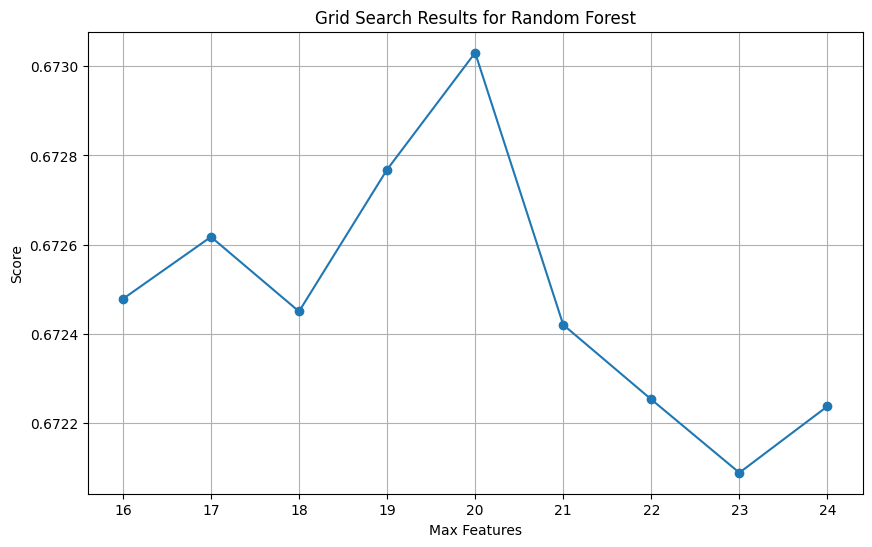

In [116]:
results = grid_search_rf.cv_results_
max_depth_values = results['param_classifier__max_features'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Random Forest')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [118]:
param_grid = {
    'classifier__n_estimators' : [400, 500],
    'classifier__max_features' : [20]
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_features': [20],
                         'classifier__n_estimators': [400, 500]},
             scoring='f1_macro')

In [119]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 20, 'classifier__n_estimators': 400}


In [120]:
best_score = grid_search_rf.best_score_
print(best_score)

0.6742197255073682


In [127]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_train)
tree_report_test = classification_report(y_train, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.95      0.75      0.84    276667
           1       0.66      0.72      0.69    149180
           2       0.86      0.88      0.87    145825
           3       0.35      1.00      0.51     22065

    accuracy                           0.78    593737
   macro avg       0.70      0.84      0.73    593737
weighted avg       0.83      0.78      0.80    593737



In [128]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.94      0.72      0.82     30741
           1       0.61      0.67      0.64     16576
           2       0.83      0.86      0.85     16203
           3       0.27      0.79      0.40      2451

    accuracy                           0.75     65971
   macro avg       0.66      0.76      0.68     65971
weighted avg       0.80      0.75      0.76     65971



In [122]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Care/Education/Business',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Visits', 'Education_Higher education',
       'Education_Lower vocational', 'Education_Other', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23'],
      dtype='obje

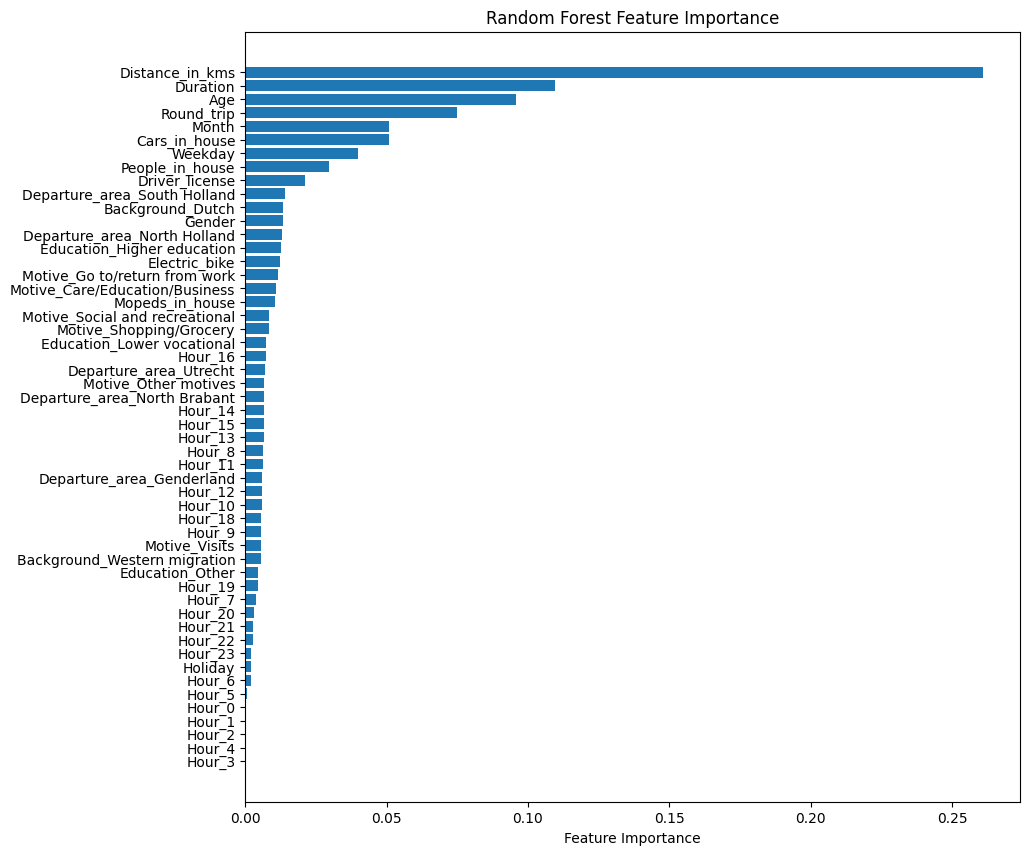

In [123]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Care/Education/Business',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Visits', 'Education_Higher education',
       'Education_Lower vocational', 'Education_Other', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

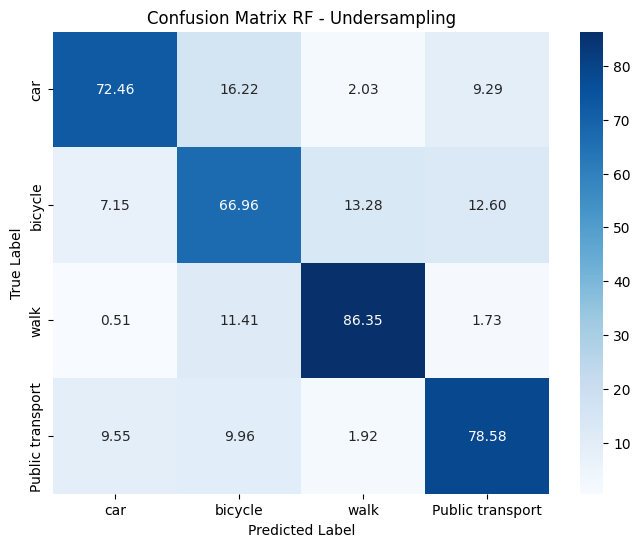

In [124]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

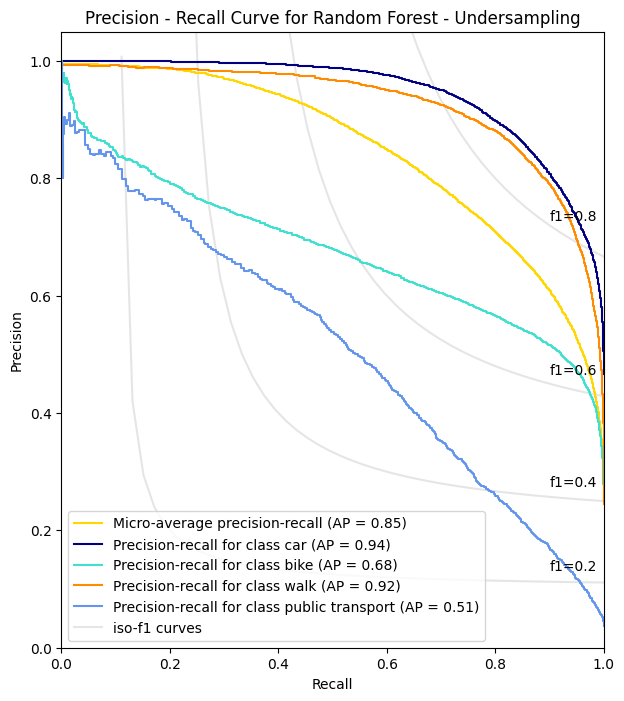

In [125]:
class_probabilities_rf = best_model.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest - Undersampling")

plt.show()

# XGBoost

In [81]:
pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler()),
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy = "auto")),
    ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42))
])

In [82]:
param_grid = {
    'classifier__colsample_bytree' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_typ...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1]},
             scoring='f1_macro')

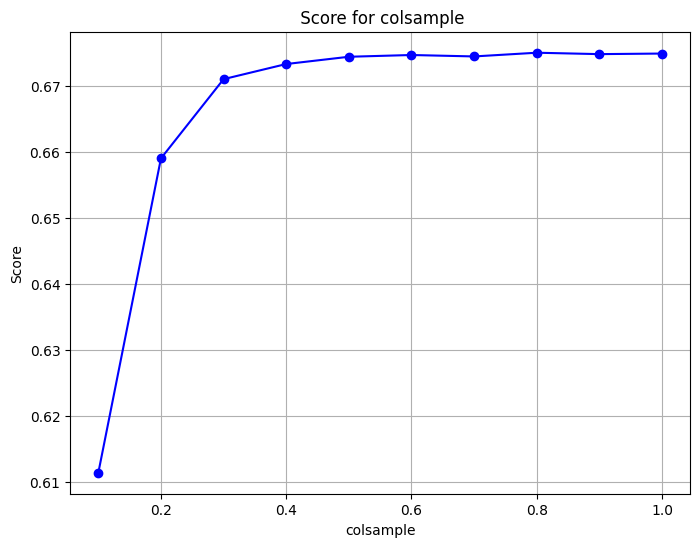

In [83]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample')
plt.xlabel('colsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [84]:
param_grid = {
    'classifier__subsample' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

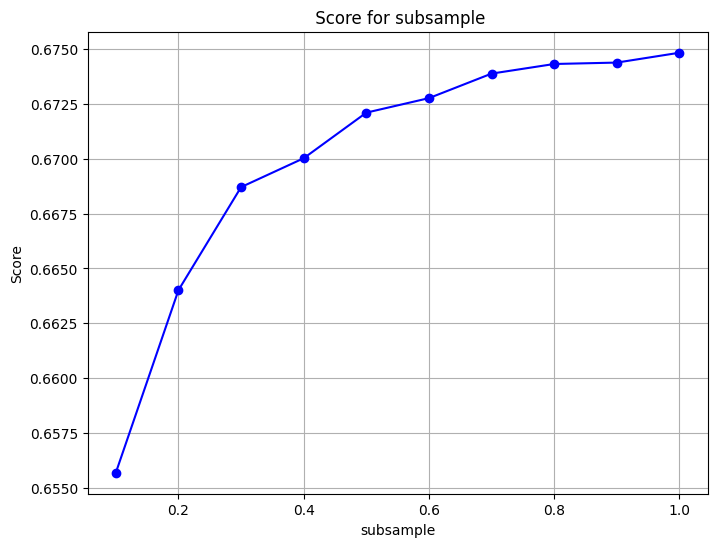

In [85]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [86]:
param_grid = {
    'classifier__learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

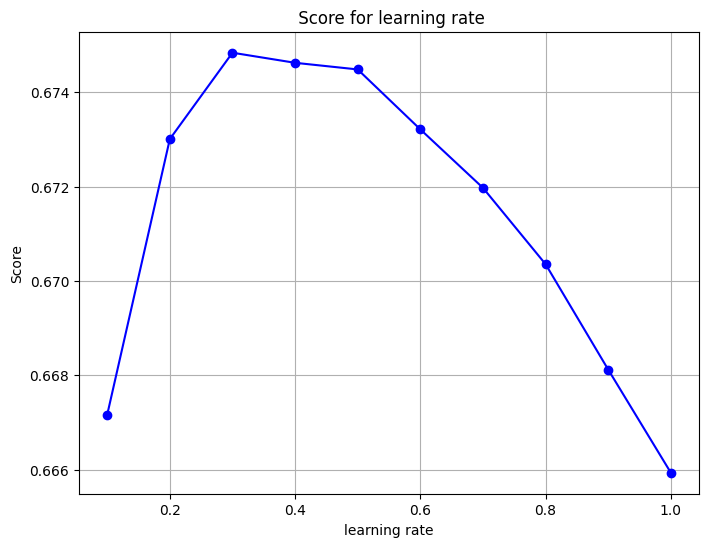

In [87]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__learning_rate']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for learning rate')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [88]:
param_grid = {
    'classifier__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

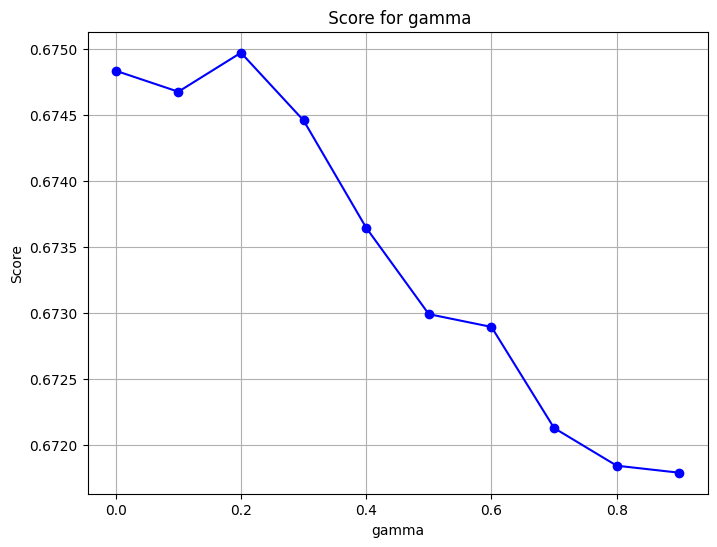

In [89]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__gamma']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for gamma')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [90]:
param_grid = {
    'classifier__reg_lambda': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

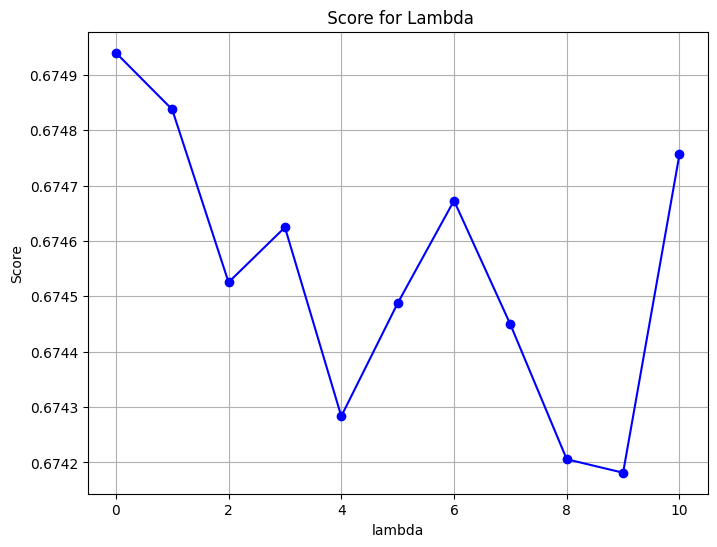

In [91]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__reg_lambda']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Lambda')
plt.xlabel('lambda')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [97]:
param_grid = {
    'classifier__learning_rate' : [0.3],
    'classifier__subsample' : [0.9], 
    'classifier__n_estimators' : [350, 450],
    'classifier__colsample_bytree' : [0.6],
    'classifier__gamma' : [0.2],
    'classifier__reg_lambda' : [10]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.3, 'classifier__n_estimators': 350, 'classifier__reg_lambda': 10, 'classifier__subsample': 0.9}


In [98]:
score = grid_search.best_score_
score

0.6770819974289084

In [99]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     30741
           1       0.62      0.68      0.65     16576
           2       0.83      0.86      0.85     16203
           3       0.28      0.76      0.41      2451

    accuracy                           0.75     65971
   macro avg       0.66      0.76      0.68     65971
weighted avg       0.80      0.75      0.77     65971



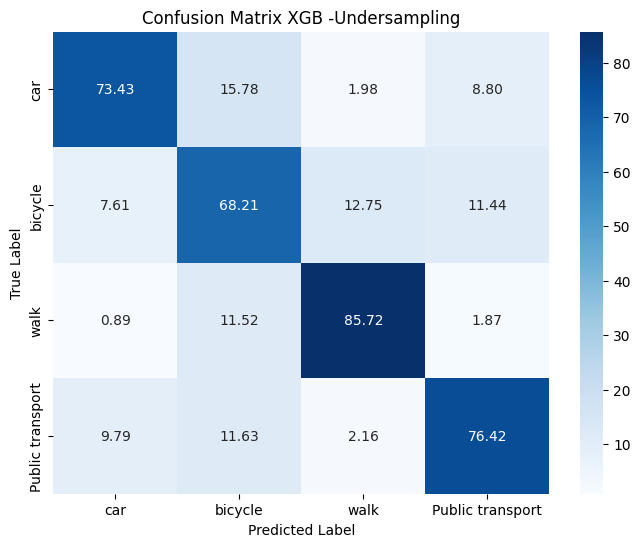

In [104]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB -Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

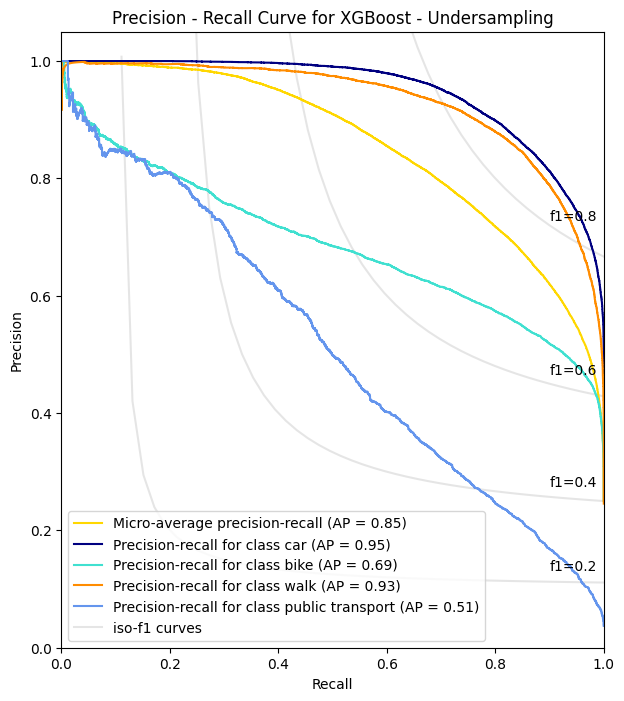

In [105]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for XGBoost - Undersampling")

plt.show()

In [108]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Care/Education/Business',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Visits', 'Education_Higher education',
       'Education_Lower vocational', 'Education_Other', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23'],
      dtype='obje

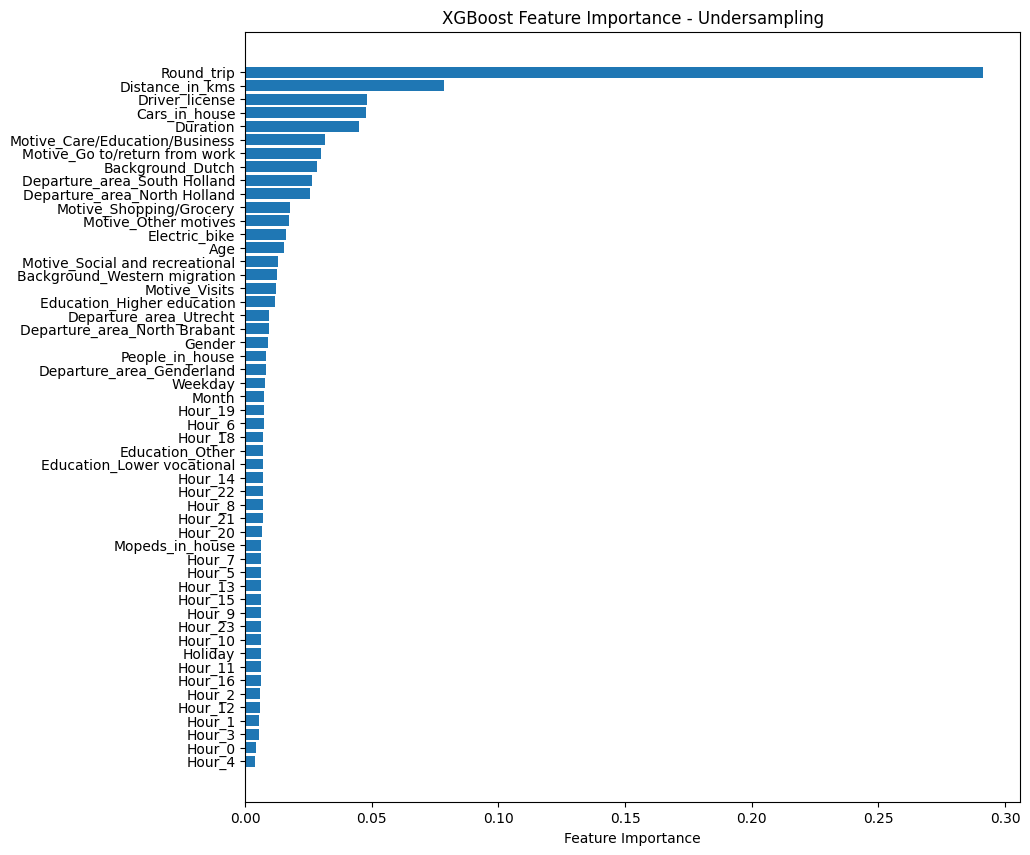

In [109]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Care/Education/Business',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Visits', 'Education_Higher education',
       'Education_Lower vocational', 'Education_Other', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance - Undersampling")
plt.show()